# Fashion MNIST: Mystery Labels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import timeit

In [2]:
# connecting google drive
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load the datasets
x_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/x_train.csv').values
y_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/y_train.csv').values
x_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/x_test.csv').values
y_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/y_test.csv').values

In [4]:
x_train.shape

(60000, 784)

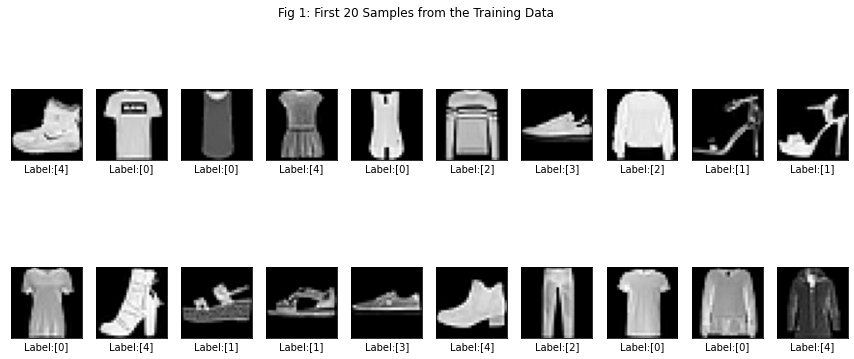

In [5]:
# Visualize first 20 examples
# visualize some of the training images
NUM_OF_SAMPLES = 20
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(15,6))

for i in range(NUM_OF_SAMPLES):
    image = x_train[i] # plot the sample
    ax[i//10][i%10].imshow(image.reshape([28,28]), cmap='gray')
    ax[i//10][i%10].set_xticks([])
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xlabel('Label:'+ str(y_train[i]))

fig.suptitle('Fig 1: First 20 Samples from the Training Data')
plt.show()

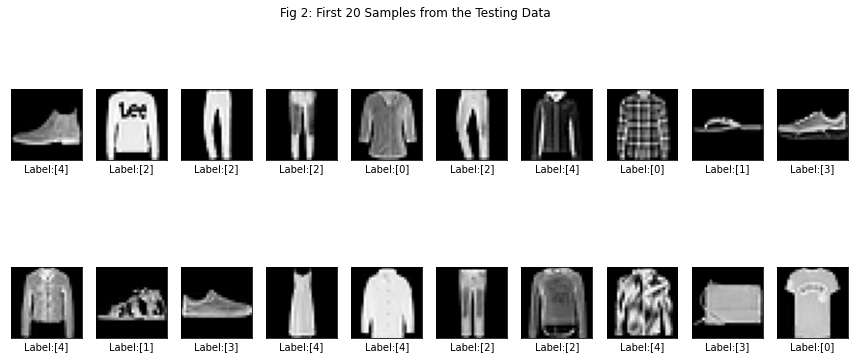

In [6]:
# Visualize first 20 examples
# visualize some of the test images
NUM_OF_SAMPLES = 20
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(15,6))

for i in range(NUM_OF_SAMPLES):
    image = x_test[i] # plot the sample
    ax[i//10][i%10].imshow(image.reshape([28,28]), cmap='gray')
    ax[i//10][i%10].set_xticks([])
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xlabel('Label:'+ str(y_test[i]))

fig.suptitle('Fig 2: First 20 Samples from the Testing Data')
plt.show()

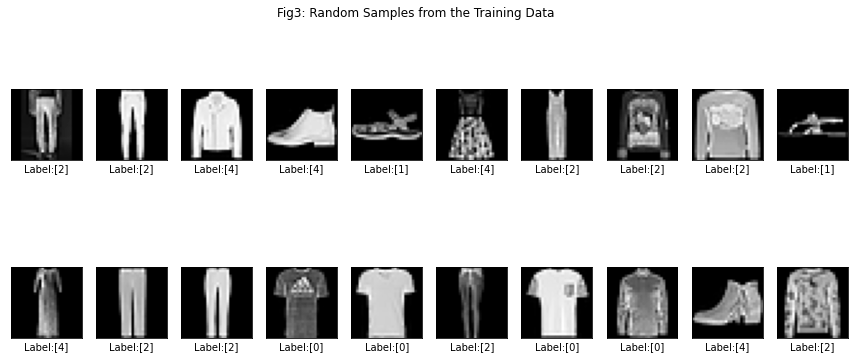

In [7]:
# visualize some of the training images
NUM_OF_SAMPLES = 20
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(15,6))

for i in range(NUM_OF_SAMPLES):
    index = np.random.choice(len(x_train))
    image = x_train[index] # plot the sample
    ax[i//10][i%10].imshow(image.reshape([28,28]), cmap='gray')
    ax[i//10][i%10].set_xticks([])
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xlabel('Label:'+ str(y_train[index]))

fig.suptitle('Fig3: Random Samples from the Training Data')
plt.show()

In [8]:
num_classes = 5
input_shape = (28, 28, 1)

# Normalize the data
# Scale images to the [0, 1] range
X_train = x_train.astype("float32") / 255
X_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

## [CM1] CNN Model
- Two CNN layers with Kernel size of (3,3) and 32 filters, stride of 1 with padding size of (1,1) and max-pooling between these two CNN layer with pool size of (2,2) and at the end one fully that map the last CNN layer to 5 outputs.
- ReLU activation functions.
- Softmax output layer for the classification decision

Note that strides by default is 1.



In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
____________________________________________________

In [11]:
start = timeit.default_timer()

# Training
batch_size = 256
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

stop = timeit.default_timer()
execution_time_traindata = stop - start
print('Time taken to execute training data in seconds:',execution_time_traindata)


Epoch 1/50
211/211 [==============================] - 13s 15ms/step - loss: 0.5045 - accuracy: 0.8010 - val_loss: 0.3708 - val_accuracy: 0.8563
Epoch 2/50
211/211 [==============================] - 3s 12ms/step - loss: 0.3147 - accuracy: 0.8869 - val_loss: 0.2856 - val_accuracy: 0.8950
Epoch 3/50
211/211 [==============================] - 3s 12ms/step - loss: 0.2677 - accuracy: 0.9055 - val_loss: 0.2560 - val_accuracy: 0.9067
Epoch 4/50
211/211 [==============================] - 3s 12ms/step - loss: 0.2444 - accuracy: 0.9140 - val_loss: 0.2426 - val_accuracy: 0.9140
Epoch 5/50
211/211 [==============================] - 3s 12ms/step - loss: 0.2250 - accuracy: 0.9194 - val_loss: 0.2379 - val_accuracy: 0.9118
Epoch 6/50
211/211 [==============================] - 3s 12ms/step - loss: 0.2069 - accuracy: 0.9272 - val_loss: 0.2192 - val_accuracy: 0.9205
Epoch 7/50
211/211 [==============================] - 3s 12ms/step - loss: 0.1969 - accuracy: 0.9299 - val_loss: 0.2056 - val_accuracy: 0.925

[]

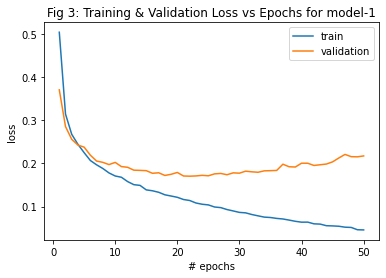

In [12]:
# Plot accuracy/loss curves
plt.plot(range(1, epochs+1), history.history['loss'], label='train')
plt.plot(range(1, epochs+1), history.history['val_loss'], label='validation')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Fig 3: Training & Validation Loss vs Epochs for model-1')
plt.plot()

[]

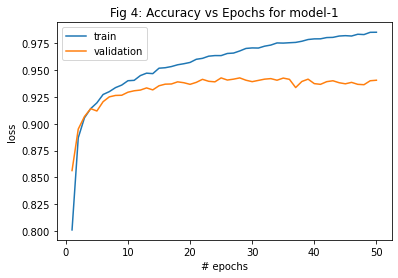

In [13]:
# Plot accuracy vs epoch curves
plt.plot(range(1, epochs+1), history.history['accuracy'], label='train')
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='validation')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Fig 4: Accuracy vs Epochs for model-1')
plt.plot()

We used model.evaluate because it is easier to calcuate loss along with accuracy as compared to using model.predict. However both methods should result in same outcome for accuracy.

In [14]:
# Testing
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# count how many correct predictions
acc = sum(y_true == y_pred)/len(y_true)*100
print('Accuracy = %.2f%%' % (acc))

Accuracy = 93.73%


In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss: %.2f%%" %(score[0]*100))
print("Test accuracy: %.2f%%" %(score[1]*100))

Test loss: 25.46%
Test accuracy: 93.73%


## [CM2] CNN Model - 2
Some changes were made in the above model. 
- The number of filters in the second convolutional layer is increased to 64
- Added another Fully Connected Layer of dimension 196
- Added Dropout of 0.5

In [16]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(196, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)             

In [17]:
start = timeit.default_timer()

# Training
batch_size = 256
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

stop = timeit.default_timer()
execution_time_traindata = stop - start
print('Time taken to execute training data in seconds:',execution_time_traindata)


Epoch 1/50
211/211 [==============================] - 5s 17ms/step - loss: 0.5063 - accuracy: 0.8012 - val_loss: 0.3011 - val_accuracy: 0.8870
Epoch 2/50
211/211 [==============================] - 3s 15ms/step - loss: 0.3180 - accuracy: 0.8845 - val_loss: 0.2498 - val_accuracy: 0.9088
Epoch 3/50
211/211 [==============================] - 3s 15ms/step - loss: 0.2730 - accuracy: 0.9021 - val_loss: 0.2225 - val_accuracy: 0.9173
Epoch 4/50
211/211 [==============================] - 3s 15ms/step - loss: 0.2453 - accuracy: 0.9120 - val_loss: 0.2050 - val_accuracy: 0.9262
Epoch 5/50
211/211 [==============================] - 3s 16ms/step - loss: 0.2263 - accuracy: 0.9176 - val_loss: 0.1926 - val_accuracy: 0.9302
Epoch 6/50
211/211 [==============================] - 3s 15ms/step - loss: 0.2134 - accuracy: 0.9222 - val_loss: 0.1871 - val_accuracy: 0.9308
Epoch 7/50
211/211 [==============================] - 3s 15ms/step - loss: 0.2003 - accuracy: 0.9276 - val_loss: 0.1776 - val_accuracy: 0.9345

[]

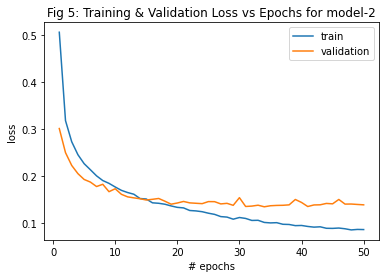

In [18]:
# Plot accuracy/loss curves
plt.plot(range(1, epochs+1), history.history['loss'], label='train')
plt.plot(range(1, epochs+1), history.history['val_loss'], label='validation')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Fig 5: Training & Validation Loss vs Epochs for model-2')
plt.plot()

[]

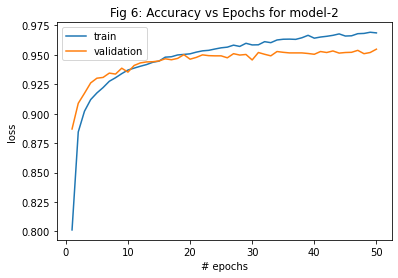

In [19]:
# Plot accuracy vs epoch curves
plt.plot(range(1, epochs+1), history.history['accuracy'], label='train')
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='validation')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Fig 6: Accuracy vs Epochs for model-2')
plt.plot()

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss: %.2f%%" %(score[0]*100))
print("Test accuracy: %.2f%%" %(score[1]*100))

Test loss: 14.88%
Test accuracy: 95.23%


In [21]:
# Testing
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# shows the first 10 predicted vs true class label values
print("first 10 predicted labels: ",y_pred[:10]) 
print("first 10 true labels: ",y_true[:10])

# count how many correct predictions
acc = sum(y_true == y_pred)/len(y_true)*100
print('Accuracy = %.2f%%' % (acc))

first 10 predicted labels:  [4 2 2 2 0 2 4 0 1 3]
first 10 true labels:  [4 2 2 2 0 2 4 0 1 3]
Accuracy = 95.23%


## [CM4] Using Your Own Encoding
We are using the 128-dimensional output of the first Dense layer as the encoding.
### PCA
Apply PCA on the encoding of test images.

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns

In [23]:
# Use the output of the final Dense layer as the encoding 
# It is a 5-dimensional vector
enc_model = keras.Model(model.layers[0].input, model.layers[6].output)

In [24]:
enc_model

In [25]:
# get an encoding on a sample data
X_encoding = enc_model(X_test)
X_encoding.shape

TensorShape([10000, 196])

using random_state=27 as we had used the same state for previous assignemnts. and hence we just wanted to ensure consistency.

In [26]:
# perform PCA
pca = PCA(n_components=2, random_state=27)
pca.fit(X_encoding)
pca.explained_variance_

array([26.62279805, 14.32336297])

In [27]:
X_pca = pca.transform(X_encoding)

[]

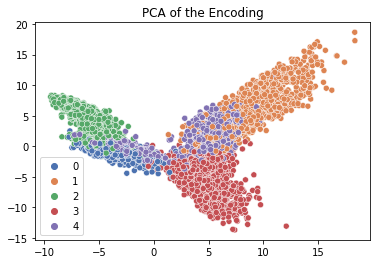

In [28]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_test.flatten(), palette="deep")
plt.title('PCA of the Encoding')
plt.plot()

### Clustering: k-means & DBSCAN

In [29]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

In [30]:
kmeans = KMeans(n_clusters=5, random_state=27).fit(X_encoding)
kmeans.labels_.shape

(10000,)

[]

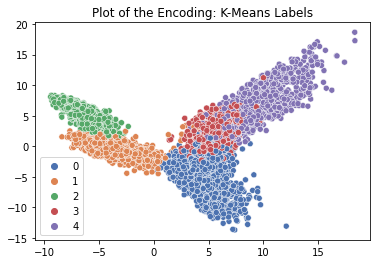

In [31]:
# Use the k-means labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="deep")
plt.title('Plot of the Encoding: K-Means Labels')
plt.plot()

DBSCAN

In [32]:
# DBSCAN Clustering
clustering = DBSCAN(eps=5, min_samples=165).fit(X_encoding)
np.unique(clustering.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([4179,  880, 4057,  650,  234]))

[]

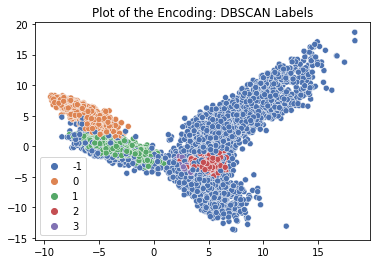

In [33]:
# Use the DBSCAN labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clustering.labels_, palette="deep")
plt.title('Plot of the Encoding: DBSCAN Labels')
plt.plot()

t-SNE

In [34]:
# T-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=27).fit_transform(X_encoding)
X_embedded.shape

(10000, 2)

[]

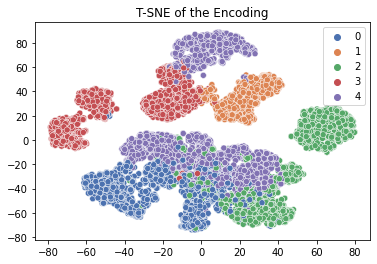

In [35]:
# T-SNE visualization
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_test.flatten(), palette="deep")
plt.title('T-SNE of the Encoding')
plt.plot()

From the above clusters we can see that classes 0,2,4 have some overlapping elements while class 1 is almost perfectly separated. Reducing 0-9 classes to 0-4 classes would mean that some of the similar elements are grouped into a class. and hence our mystery labels could signify multiple clothing items.

###Predicting the mystery labels:

Let us use kmeans clustering to visualize the mystery classes.

In [80]:
x_test_subset = x_test
y_test_subset = kmeans.labels_

x_test_subset = x_test_subset.reshape((-1, 28, 28))

print("x_test_subset shape:", x_test_subset.shape)
#print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.array(x_test_subset[y_test_subset == 0])
x_class_1 = np.array(x_test_subset[y_test_subset == 1])
x_class_2 = np.array(x_test_subset[y_test_subset == 2])
x_class_3 = np.array(x_test_subset[y_test_subset == 3])
x_class_4 = np.array(x_test_subset[y_test_subset == 4])

x_test_subset shape: (10000, 28, 28)


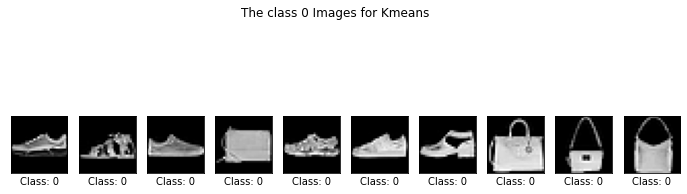

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_0[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 0')

fig.suptitle('The class 0 Images for Kmeans')
plt.show()

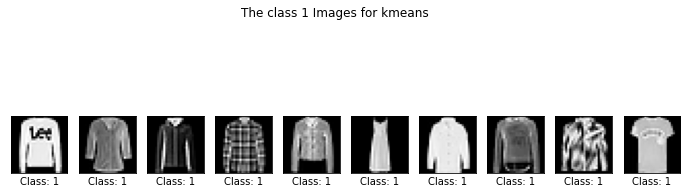

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_1[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 1')

fig.suptitle('The class 1 Images for kmeans')
plt.show()

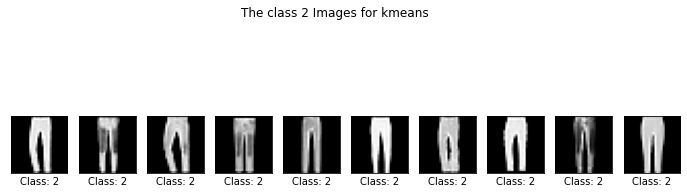

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_2[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 2')

fig.suptitle('The class 2 Images for kmeans')
plt.show()

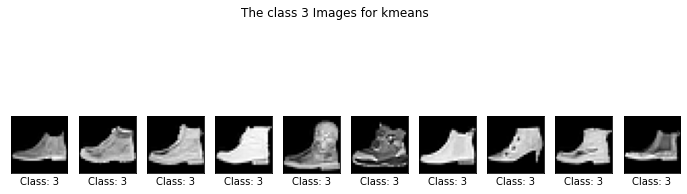

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_3[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 3')

fig.suptitle('The class 3 Images for kmeans')
plt.show()

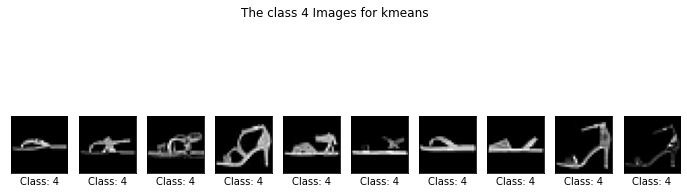

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_4[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 4')

fig.suptitle('The class 4 Images for kmeans')
plt.show()

In [76]:
x_class_0 = np.mean(x_test_subset[y_test_subset == 0], axis=0)
x_class_1 = np.mean(x_test_subset[y_test_subset == 1], axis=0)
x_class_2 = np.mean(x_test_subset[y_test_subset == 2], axis=0)
x_class_3 = np.mean(x_test_subset[y_test_subset == 3], axis=0)
x_class_4 = np.mean(x_test_subset[y_test_subset == 4], axis=0)

x_class = np.array([x_class_0, x_class_1, x_class_2, x_class_3, x_class_4])
x_class.shape

(5, 28, 28)

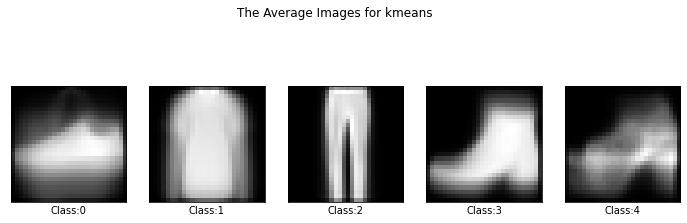

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class:'+ str(i))

fig.suptitle('The Average Images for kmeans')
plt.show()

So Mystery mappings for kmeans clustering are:

- Class 0: Sneaker, Bag
- Class 1: T-shirt/top, Shirt, Pullover, dress, coat
- Class 2: Trouser
- Class 3: Ankle boot
- Class 4: Sandal 

Now, let us check the test data using same method as above.

In [44]:
mapping = {k:[] for k in range(5)}
for mystery, actual in zip(y_test.flatten(), X_embedded.flatten()):
  if actual not in mapping[mystery]:
    mapping[mystery].append(actual)

In [45]:
mapping.values

<function dict.values>

In [46]:
# counting how many samples of each mystery class are present in our test set
counts = {k: 0 for k in range(5)}

for label in y_test.flatten():
    counts[label] += 1

In [47]:
counts

{0: 2000, 1: 1000, 2: 2000, 3: 2000, 4: 3000}

In [48]:
# Let's plot the class of images 
x_test_subset = x_test
y_test_subset = y_test.flatten()

x_test_subset = x_test_subset.reshape((-1, 28, 28))

print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.array(x_test_subset[y_test_subset == 0])
x_class_1 = np.array(x_test_subset[y_test_subset == 1])
x_class_2 = np.array(x_test_subset[y_test_subset == 2])
x_class_3 = np.array(x_test_subset[y_test_subset == 3])
x_class_4 = np.array(x_test_subset[y_test_subset == 4])

x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)


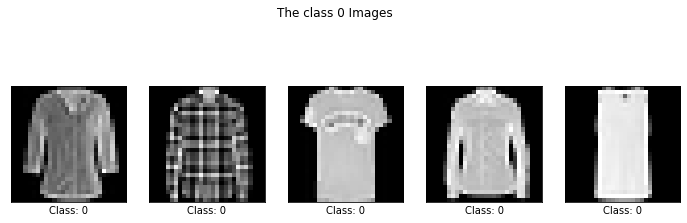

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_0[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 0')

fig.suptitle('The class 0 Images')
plt.show()

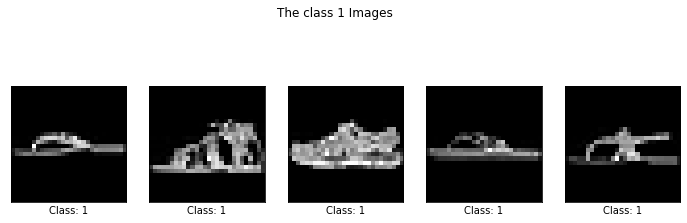

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_1[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 1')

fig.suptitle('The class 1 Images')
plt.show()

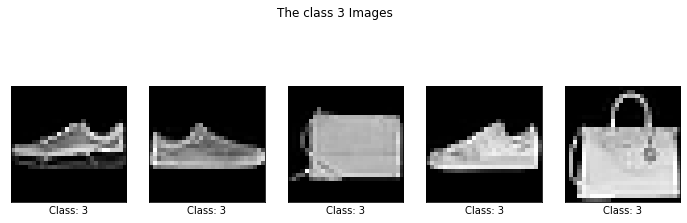

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_3[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 3')

fig.suptitle('The class 3 Images')
plt.show()

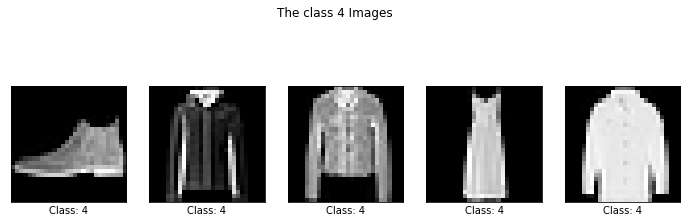

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_4[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 4')

fig.suptitle('The class 4 Images')
plt.show()

In [54]:
# Let's plot the average of images 
x_test_subset = x_test
y_test_subset = y_test.flatten()

x_test_subset = x_test_subset.reshape((-1, 28, 28))

print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.mean(x_test_subset[y_test_subset == 0], axis=0)
x_class_1 = np.mean(x_test_subset[y_test_subset == 1], axis=0)
x_class_2 = np.mean(x_test_subset[y_test_subset == 2], axis=0)
x_class_3 = np.mean(x_test_subset[y_test_subset == 3], axis=0)
x_class_4 = np.mean(x_test_subset[y_test_subset == 4], axis=0)

x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)


In [55]:
x_class = np.array([x_class_0, x_class_1, x_class_2, x_class_3, x_class_4])
x_class.shape

(5, 28, 28)

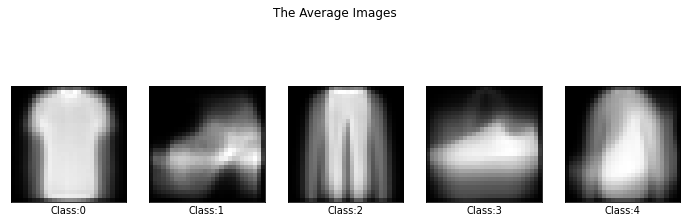

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class:'+ str(i))

fig.suptitle('The Average Images')
plt.show()


So Mystery mappings for original test set are:

- Class 0: T-shirt/top, Shirt
- Class 1: Sandal
- Class 2: Trouser, Pullover
- Class 3: Sneaker, Bag
- Class 4: Dress, Coat, Ankle boot